# Trabajo Integrador - Bootcamp Data Science

**Estudiante**: ## Luis Santaella

El trabajo consiste en desarrollar un proceso de Ciencia de datos sobre un escenario de una entidad financiera.


## Analisis exploratorio

Esta seccion contiene el analisis explotario de los datos.

Se define Columnas con sus tipos de datos y luego  un analisis de cada caracteristica.


Variables:
- ID: identificacodor del cliente.
- LIMIT_BAL: monto de crédito otorgado en dolares.
1
- SEX: genero (1=male, 2=female)
- EDUCATION: educación (1=graduate school, 2=university, 3=high school,
4=others, 5=unknown, 6=unknown)
- MARRIAGE: estado civi (1=married, 2=single, 3=others)
- AGE: edad en años
- PAY_0: estado de pago a septiembre 2005 (-1=pay duly, 1=payment delay for
one month, 2=payment delay for two months, … 8=payment delay for eight months,
9=payment delay for nine months and above)
- PAY_2: estado de pago a agosto 2005
- PAY_3: estado de pago a julio 2005
- PAY_4: estado de pago a junio 2005
- PAY_5: estado de pago a mayo 2005
- PAY_6: estado de pago a abril 2005
- BILL_AMT1: monto del estado de cuenta a septiembre 2005 en dólares
- BILL_AMT2: monto del estado de cuenta a agosto 2005 en dólares
- BILL_AMT3: monto del estado de cuenta a julio 2005 en dólares
- BILL_AMT4: monto del estado de cuenta a junio 2005 en dólares
- BILL_AMT5: monto del estado de cuenta a mayo 2005 en dólares
- BILL_AMT6: monto del estado de cuenta a abril 2005 en dólares
- PAY_AMT1: importe del pago anterior en septiembre 2005 en dólares
- PAY_AMT2: importe del pago anterior en agosto 2005 en dólares
- PAY_AMT3: importe del pago anterior en julio 2005 en dólares
- PAY_AMT4: importe del pago anterior en junio 2005 en dólares
- PAY_AMT5: importe del pago anterior en mayo 2005 en dólares
- PAY_AMT6: importe del pago anterior en abril 2005 en dólares
- default.payment.next.month: Default payment (1=yes, 0=no)

Importamos la dependecias del proyecto con las que vamos a trabajar

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier
## Agregar mas recuersos de ser necesario

In [2]:
#importamos la data
df = pd.read_csv('dataset.csv')
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

Realizamos el analisis explotario por cada variable para conocer sus valores  y distribuciones.

In [4]:
df['LIMIT_BAL'].describe()

count      30000.000000
mean      167484.322667
std       129747.661567
min        10000.000000
25%        50000.000000
50%       140000.000000
75%       240000.000000
max      1000000.000000
Name: LIMIT_BAL, dtype: float64

<Axes: >

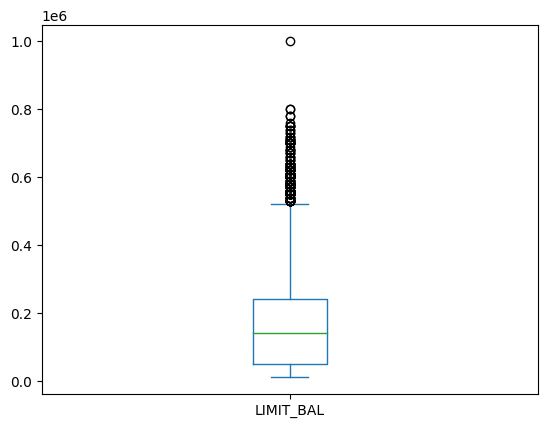

In [5]:
df['LIMIT_BAL'].plot(kind='box')

c:\Users\santa\Desktop\Alkemy\alkemy\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


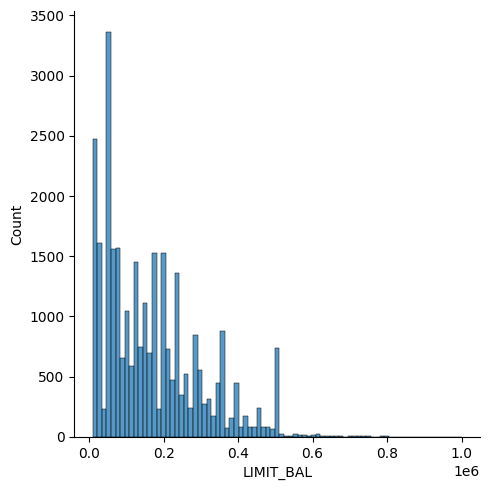

In [7]:
sns.displot(data=df, x='LIMIT_BAL')

c:\Users\santa\Desktop\Alkemy\alkemy\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


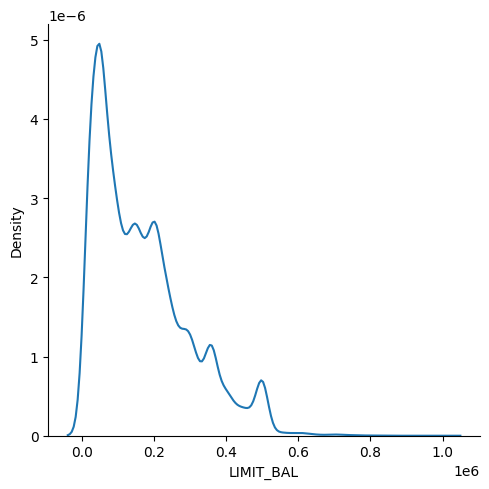

In [8]:
sns.displot(data=df, x='LIMIT_BAL', kind='kde')

A partir del analisis de la distribucion de la variable LIMIT_BAL, se evidencia una concentracion del conjuntoi ide datos en el intervalo [0,600000] aprox.
Los valores superiores a 600000 se podrian considerar como atipicos.

**SEX**

In [9]:
df['SEX'].value_counts()

SEX
2    18112
1    11888
Name: count, dtype: int64

<Axes: xlabel='SEX'>

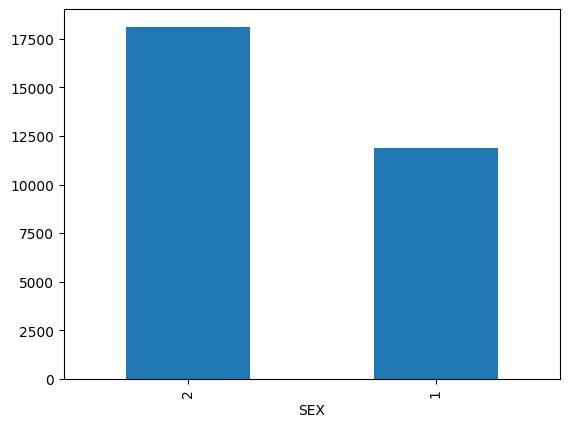

In [11]:
# df['SEX'].plot(kind='hist')
df['SEX'].value_counts().plot(kind="bar") # los graficos de barras para variables categoricas son los mas utiles.

El analisis nos demuestra que la columna esta compuesta de los valores declarados y estan de forma uniforme.

**EDUCATION**                   

In [12]:
# EDUCATION: educación (1=graduate school, 2=university, 3=high school,
# 4=others, 5=unknown, 6=unknown)
df['EDUCATION'].value_counts()

EDUCATION
2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: count, dtype: int64

<Axes: xlabel='EDUCATION'>

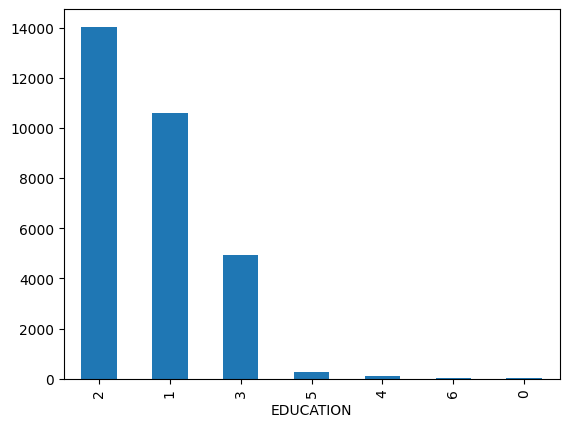

In [13]:
df['EDUCATION'].value_counts().plot(kind="bar")

De acuerdo al analisis 5 y 6 contienen el mismo valor, sin embargo, aparece un valor no declarado que es 0. Tambien que la mayor concentracion de los datos esta en 2 y 1.

**MARRIAGE**: estado civi (1=married, 2=single, 3=others)

In [14]:
df['MARRIAGE'].value_counts()

MARRIAGE
2    15964
1    13659
3      323
0       54
Name: count, dtype: int64

<Axes: xlabel='MARRIAGE'>

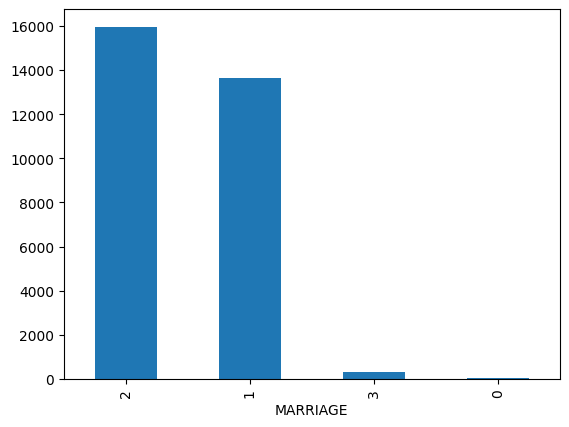

In [15]:
df['MARRIAGE'].value_counts().plot(kind="bar")

Segun el analisis la mayoria de los datos se concentran en 2 y 1. Tambien aparece un valor no declarado que es el 0.

**AGE: edad en años**

In [16]:
df['AGE'].value_counts()

AGE
29    1605
27    1477
28    1409
30    1395
26    1256
31    1217
25    1186
34    1162
32    1158
33    1146
24    1127
35    1113
36    1108
37    1041
39     954
38     944
23     931
40     870
41     824
42     794
44     700
43     670
45     617
46     570
22     560
47     501
48     466
49     452
50     411
51     340
53     325
52     304
54     247
55     209
56     178
58     122
57     122
59      83
60      67
21      67
61      56
62      44
63      31
64      31
66      25
65      24
67      16
69      15
70      10
68       5
73       4
72       3
75       3
71       3
79       1
74       1
Name: count, dtype: int64

<Axes: title={'center': 'Age Values'}, xlabel='AGE'>

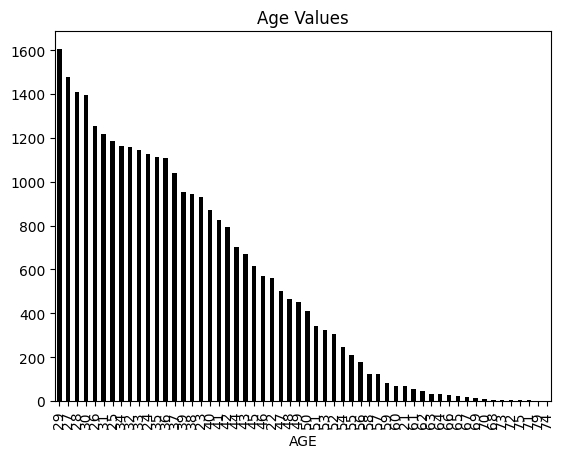

In [25]:

df['AGE'].value_counts().plot(kind="bar", color='black', title='Age Values')

## Procesamiento de datos